In [1]:
import numpy as np
import pandas as pd
import itertools
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import LinearSVC
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test = test.set_index('id', drop = True)

In [3]:
# Counting number of rows and columns in the data
print('Shape of Training Data: ', train.shape)

# Gettiing a hang of the data in each column and their names
print('\n \n TRAIN \n', train.head())
print('\n \n TEST \n', test.head())

# Looking for any places where training data has NaN values
print('\n \nNumber of Null values in Train Set: ', train['text'].isna().sum())
print('Number of Null values in Test Set: ', test['text'].isna().sum())

# Dropping all rows where text column is NaN
train.dropna(axis=0, how="any", thresh=None, subset=['text'], inplace=True)
test = test.fillna(' ')

Shape of Training Data:  (20800, 5)

 
 TRAIN 
    id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  

 
 TEST 
                                                    title  \
id                          

In [4]:
# Checking length of each article
length = []
[length.append(len(str(text))) for text in train['text']]
train['length'] = length
print('Minimum Length: ', min(train['length']), '\nMaximum Length: ', max(train['length']), '\nAverage Length: ', round(sum(train['length'])/len(train['length'])))

Minimum Length:  1 
Maximum Length:  142961 
Average Length:  4553


In [5]:
# Minimum length is 1. We need to spot some outliers and get rid of them. Counting how many outliers are there

print('Number of articles with less than 30 words: ', len(train[train['length'] < 30]))

# Skimming through such short texts just to be sure
print(train['text'][train['length'] < 30])

Number of articles with less than 30 words:  155
82                              
169                             
173              Guest   Guest  
295                             
470                             
                  ...           
20264                           
20350    I hope nobody got hurt!
20418            Guest   Guest  
20513                           
20636         Trump all the way!
Name: text, Length: 155, dtype: object


In [6]:
# Removing outliers, it will reduce overfitting
train = train.drop(train['text'][train['length'] < 30].index, axis = 0)
print('Minimum Length: ', min(train['length']), '\nMaximum Length: ', max(train['length']), '\nAverage Length: ', round(sum(train['length'])/len(train['length'])))

Minimum Length:  30 
Maximum Length:  142961 
Average Length:  4587


In [7]:
# Secluding labels in a new pandas dataframe for supervised learning
train_labels = train['label']
# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(train['text'], train_labels, test_size=0.1, random_state=0)

In [8]:
# Setting up Term Frequency - Inverse Document Frequency Vectorizer
tfidf = TfidfVectorizer(stop_words = 'english', max_df = 0.7)
# Fit and transform training set and transform test set
tfidf_train = tfidf.fit_transform(x_train) 
tfidf_test = tfidf.transform(x_test)
tfidf_test_final = tfidf.transform(test['text'])

In [9]:
# Support Vector Classifier 
svc = LinearSVC()
svc.fit(tfidf_train, y_train)

# Predicting on the test set
y_pred = svc.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score * 100, 2)}%')

Accuracy: 96.31%


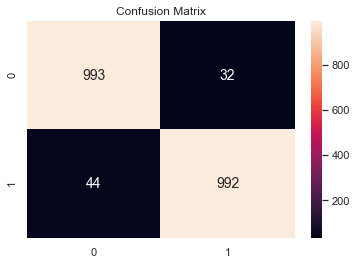


Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1025
           1       0.97      0.96      0.96      1036

    accuracy                           0.96      2061
   macro avg       0.96      0.96      0.96      2061
weighted avg       0.96      0.96      0.96      2061



In [10]:
# Creating confusion matrix with columns as True Positive, False Negative, False Positive and True Negative 
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, range(2), range(2))
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={'size':14}, fmt='d').set_title('Confusion Matrix')
plt.show()
# Creating classification report
print('\nClassification Report: \n', classification_report(y_test, (y_pred > 0.5)))

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(tfidf_train, y_train)
y_pred_RF = clf.predict(tfidf_test) 
score = accuracy_score (y_test,y_pred_RF) 
print (f' Accuracy: {round(score*100, 2)} %')


 Accuracy: 93.45 %


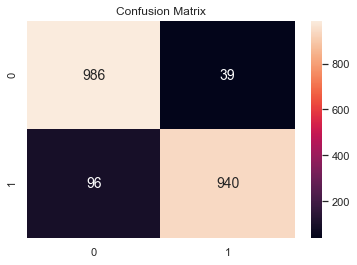


Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94      1025
           1       0.96      0.91      0.93      1036

    accuracy                           0.93      2061
   macro avg       0.94      0.93      0.93      2061
weighted avg       0.94      0.93      0.93      2061



In [12]:
# Creating confusion matrix with columns as True Positive, False Negative, False Positive and True Negative 
cm = confusion_matrix(y_test, y_pred_RF, labels=[0, 1])
df_cm = pd.DataFrame(cm, range(2), range(2))
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={'size':14}, fmt='d').set_title('Confusion Matrix')
plt.show()
# Creating classification report
print('\nClassification Report: \n', classification_report(y_test, (y_pred_RF > 0.5)))

In [13]:
model = LogisticRegression (solver='liblinear', random_state=0) 
model.fit(tfidf_train, y_train)
y_pred_LR = model.predict(tfidf_test)
score = accuracy_score (y_test, y_pred_LR)
print (f' Accuracy: {round(score*100, 2)} %')


 Accuracy: 95.44 %


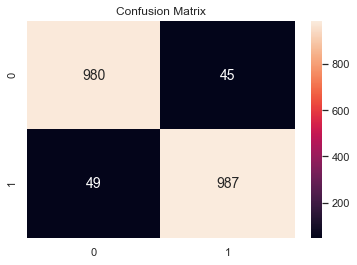


Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1025
           1       0.96      0.95      0.95      1036

    accuracy                           0.95      2061
   macro avg       0.95      0.95      0.95      2061
weighted avg       0.95      0.95      0.95      2061



In [14]:
# Creating confusion matrix with columns as True Positive, False Negative, False Positive and True Negative 
cm = confusion_matrix(y_test, y_pred_LR, labels=[0, 1])
df_cm = pd.DataFrame(cm, range(2), range(2))
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={'size':14}, fmt='d').set_title('Confusion Matrix')
plt.show()
# Creating classification report
print('\nClassification Report: \n', classification_report(y_test, (y_pred_LR > 0.5)))